# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
import tqdm

tqdm.__version__
!pip install matplotlib==2.0.2

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'
data_dir = './input'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

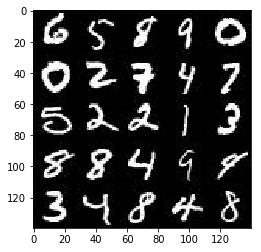

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

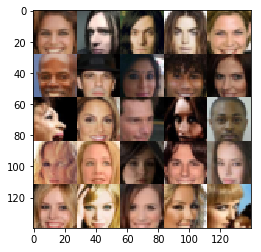

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.6.0


/home/hdomingos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape = [None, image_width, image_height, image_channels])
    input_z = tf.placeholder(tf.float32, shape = [None, z_dim])
    learning_rate = tf.placeholder(tf.float32)

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False, alpha = 0.2, is_training= True):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse = reuse):
        
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        conv1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(conv1, 128, 5, strides=2, padding='same')
        conv2 = tf.layers.batch_normalization(conv2,  training=True)
        conv2 = tf.maximum(alpha * conv2, conv2)
        
        conv3 = tf.layers.conv2d(conv2, 256, 5, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3,  training=True)
        conv3 = tf.maximum(alpha * conv3, conv3)

        flat  = tf.reshape(conv3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True, reuse =  False, alpha = 0.11):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse = not is_train):
        
        x = tf.layers.dense(z, 7*7*512)
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha * x, x)
        
        conv1 = tf.layers.conv2d_transpose(x, 256, 5, strides=1, padding="same")
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d_transpose(conv1, 128, 5, strides=2, padding="same")
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        conv2 = tf.maximum(alpha * conv2, conv2)
        
        logits = tf.layers.conv2d_transpose(conv2, out_channel_dim, 5, strides=2, padding="same")
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train= True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse= True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real))) 
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_fake + d_loss_real
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 1.3258... Generator Loss: 0.4299
Epoch 0/2... Discriminator Loss: 1.1052... Generator Loss: 0.6788
Epoch 0/2... Discriminator Loss: 1.4733... Generator Loss: 0.7057
Epoch 0/2... Discriminator Loss: 1.0033... Generator Loss: 0.8192


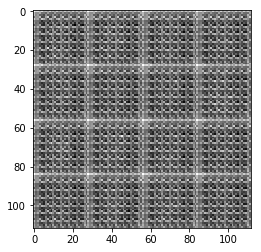

Epoch 0/2... Discriminator Loss: 0.5360... Generator Loss: 1.5707
Epoch 0/2... Discriminator Loss: 0.8926... Generator Loss: 1.5495
Epoch 0/2... Discriminator Loss: 0.5414... Generator Loss: 1.4035
Epoch 0/2... Discriminator Loss: 0.7477... Generator Loss: 1.1257
Epoch 0/2... Discriminator Loss: 0.6113... Generator Loss: 1.1677


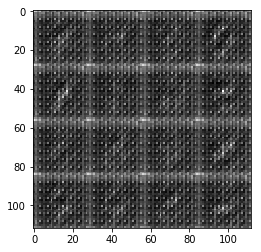

Epoch 0/2... Discriminator Loss: 1.4077... Generator Loss: 1.9601
Epoch 0/2... Discriminator Loss: 0.8813... Generator Loss: 1.1003
Epoch 0/2... Discriminator Loss: 0.7281... Generator Loss: 1.4884
Epoch 0/2... Discriminator Loss: 1.1688... Generator Loss: 0.5160
Epoch 0/2... Discriminator Loss: 1.2769... Generator Loss: 1.8328


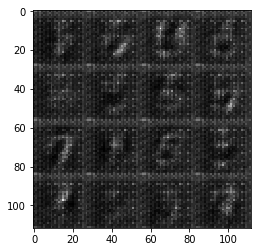

Epoch 0/2... Discriminator Loss: 1.1019... Generator Loss: 1.4115
Epoch 0/2... Discriminator Loss: 0.7974... Generator Loss: 1.1860
Epoch 0/2... Discriminator Loss: 0.7883... Generator Loss: 1.5784
Epoch 0/2... Discriminator Loss: 1.2229... Generator Loss: 1.9104
Epoch 0/2... Discriminator Loss: 0.9458... Generator Loss: 0.7341


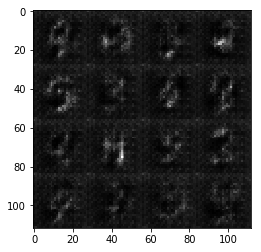

Epoch 0/2... Discriminator Loss: 1.0118... Generator Loss: 0.7415
Epoch 0/2... Discriminator Loss: 0.8929... Generator Loss: 0.8608
Epoch 0/2... Discriminator Loss: 0.7825... Generator Loss: 1.3224
Epoch 0/2... Discriminator Loss: 0.8443... Generator Loss: 0.9054
Epoch 0/2... Discriminator Loss: 0.7754... Generator Loss: 1.0032


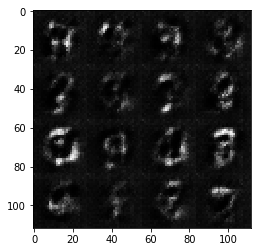

Epoch 0/2... Discriminator Loss: 1.3896... Generator Loss: 2.7179
Epoch 0/2... Discriminator Loss: 0.8771... Generator Loss: 0.8515
Epoch 0/2... Discriminator Loss: 0.8647... Generator Loss: 1.0173
Epoch 0/2... Discriminator Loss: 1.0529... Generator Loss: 0.5850
Epoch 0/2... Discriminator Loss: 0.7117... Generator Loss: 1.1402


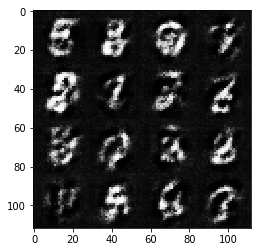

Epoch 0/2... Discriminator Loss: 0.8482... Generator Loss: 0.8757
Epoch 0/2... Discriminator Loss: 0.7638... Generator Loss: 1.4852
Epoch 0/2... Discriminator Loss: 0.6790... Generator Loss: 2.0731
Epoch 0/2... Discriminator Loss: 0.7299... Generator Loss: 1.0023
Epoch 0/2... Discriminator Loss: 0.6855... Generator Loss: 1.7056


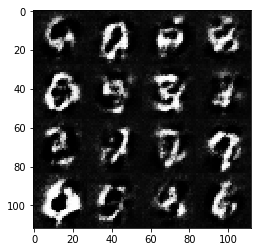

Epoch 0/2... Discriminator Loss: 0.7968... Generator Loss: 1.6130
Epoch 0/2... Discriminator Loss: 0.7229... Generator Loss: 1.5902
Epoch 0/2... Discriminator Loss: 0.7201... Generator Loss: 1.9319
Epoch 0/2... Discriminator Loss: 0.7185... Generator Loss: 1.0078
Epoch 0/2... Discriminator Loss: 0.6922... Generator Loss: 1.2713


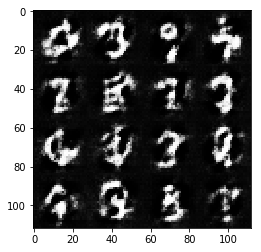

Epoch 0/2... Discriminator Loss: 0.9160... Generator Loss: 2.4652
Epoch 0/2... Discriminator Loss: 0.8321... Generator Loss: 0.8302
Epoch 0/2... Discriminator Loss: 0.8327... Generator Loss: 0.7447
Epoch 0/2... Discriminator Loss: 0.7604... Generator Loss: 0.9326
Epoch 0/2... Discriminator Loss: 0.8396... Generator Loss: 2.3594


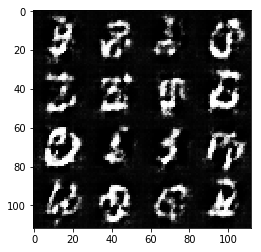

Epoch 0/2... Discriminator Loss: 0.9066... Generator Loss: 0.7540
Epoch 0/2... Discriminator Loss: 0.9244... Generator Loss: 1.8548
Epoch 0/2... Discriminator Loss: 0.7784... Generator Loss: 1.0005
Epoch 0/2... Discriminator Loss: 0.7517... Generator Loss: 1.0547
Epoch 0/2... Discriminator Loss: 0.8248... Generator Loss: 1.5886


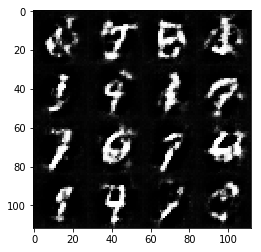

Epoch 0/2... Discriminator Loss: 0.8799... Generator Loss: 2.2560
Epoch 0/2... Discriminator Loss: 0.7163... Generator Loss: 1.7053
Epoch 0/2... Discriminator Loss: 0.8284... Generator Loss: 0.7803
Epoch 0/2... Discriminator Loss: 0.7318... Generator Loss: 1.8826
Epoch 0/2... Discriminator Loss: 0.7381... Generator Loss: 1.4679


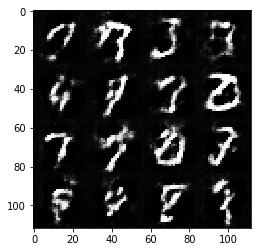

Epoch 0/2... Discriminator Loss: 0.6699... Generator Loss: 1.2880
Epoch 0/2... Discriminator Loss: 0.8452... Generator Loss: 0.8620
Epoch 0/2... Discriminator Loss: 0.8579... Generator Loss: 1.9955
Epoch 0/2... Discriminator Loss: 1.2875... Generator Loss: 0.4166
Epoch 0/2... Discriminator Loss: 0.9463... Generator Loss: 0.6719


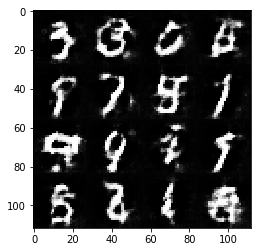

Epoch 0/2... Discriminator Loss: 0.7277... Generator Loss: 0.9972
Epoch 0/2... Discriminator Loss: 1.0691... Generator Loss: 2.2435
Epoch 0/2... Discriminator Loss: 0.8963... Generator Loss: 0.9254
Epoch 0/2... Discriminator Loss: 0.9466... Generator Loss: 0.7722
Epoch 0/2... Discriminator Loss: 0.7914... Generator Loss: 1.7450


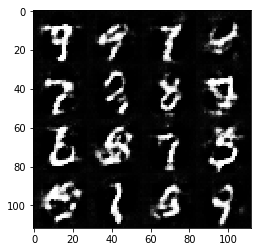

Epoch 0/2... Discriminator Loss: 0.6936... Generator Loss: 1.5197
Epoch 0/2... Discriminator Loss: 1.0427... Generator Loss: 1.9676
Epoch 0/2... Discriminator Loss: 0.7110... Generator Loss: 1.3674
Epoch 0/2... Discriminator Loss: 0.8874... Generator Loss: 0.7318
Epoch 0/2... Discriminator Loss: 0.7587... Generator Loss: 1.2667


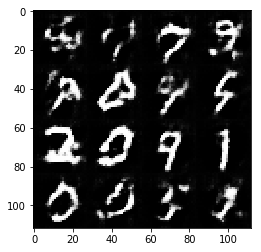

Epoch 0/2... Discriminator Loss: 0.8222... Generator Loss: 1.1000
Epoch 0/2... Discriminator Loss: 0.8582... Generator Loss: 1.9018
Epoch 0/2... Discriminator Loss: 1.1705... Generator Loss: 0.4877
Epoch 0/2... Discriminator Loss: 0.9145... Generator Loss: 0.8333
Epoch 0/2... Discriminator Loss: 0.7934... Generator Loss: 1.4664


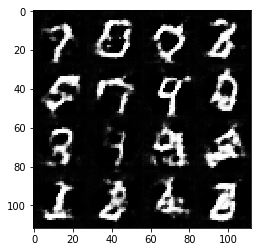

Epoch 0/2... Discriminator Loss: 1.1449... Generator Loss: 0.5147
Epoch 0/2... Discriminator Loss: 0.8073... Generator Loss: 1.1691
Epoch 0/2... Discriminator Loss: 1.0721... Generator Loss: 1.3433
Epoch 0/2... Discriminator Loss: 0.8301... Generator Loss: 1.0350
Epoch 0/2... Discriminator Loss: 0.7936... Generator Loss: 1.1755


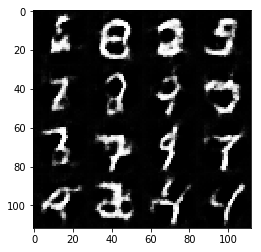

Epoch 0/2... Discriminator Loss: 0.7931... Generator Loss: 1.1708
Epoch 0/2... Discriminator Loss: 0.9082... Generator Loss: 1.4946
Epoch 0/2... Discriminator Loss: 0.9138... Generator Loss: 0.8920
Epoch 0/2... Discriminator Loss: 0.8268... Generator Loss: 1.0738
Epoch 0/2... Discriminator Loss: 0.8312... Generator Loss: 1.0104


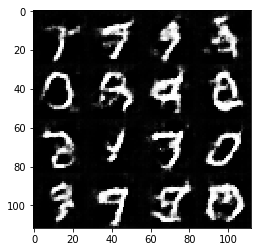

Epoch 0/2... Discriminator Loss: 0.9313... Generator Loss: 0.7282
Epoch 0/2... Discriminator Loss: 1.3308... Generator Loss: 0.3882
Epoch 0/2... Discriminator Loss: 0.8577... Generator Loss: 1.2956
Epoch 0/2... Discriminator Loss: 0.9191... Generator Loss: 1.1471
Epoch 0/2... Discriminator Loss: 1.0274... Generator Loss: 0.7344


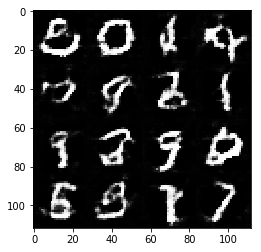

Epoch 0/2... Discriminator Loss: 1.1263... Generator Loss: 0.6076
Epoch 0/2... Discriminator Loss: 0.8411... Generator Loss: 1.0510
Epoch 0/2... Discriminator Loss: 1.0540... Generator Loss: 0.6180
Epoch 0/2... Discriminator Loss: 1.0822... Generator Loss: 1.4702
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 0.6210


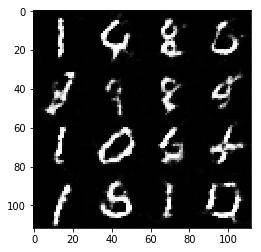

Epoch 1/2... Discriminator Loss: 1.1794... Generator Loss: 1.2455
Epoch 1/2... Discriminator Loss: 0.9495... Generator Loss: 0.9163
Epoch 1/2... Discriminator Loss: 0.8701... Generator Loss: 1.1991
Epoch 1/2... Discriminator Loss: 0.9492... Generator Loss: 0.8018
Epoch 1/2... Discriminator Loss: 0.8310... Generator Loss: 1.5664


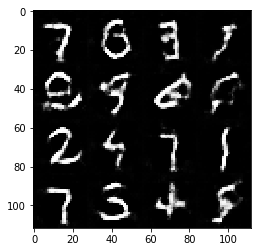

Epoch 1/2... Discriminator Loss: 0.9003... Generator Loss: 1.0790
Epoch 1/2... Discriminator Loss: 0.9527... Generator Loss: 1.6447
Epoch 1/2... Discriminator Loss: 1.0083... Generator Loss: 0.6623
Epoch 1/2... Discriminator Loss: 0.9128... Generator Loss: 1.5768
Epoch 1/2... Discriminator Loss: 0.8568... Generator Loss: 1.0085


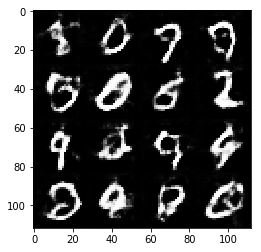

Epoch 1/2... Discriminator Loss: 0.8772... Generator Loss: 1.3418
Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 0.4751
Epoch 1/2... Discriminator Loss: 0.8809... Generator Loss: 0.9299
Epoch 1/2... Discriminator Loss: 0.9089... Generator Loss: 1.3732
Epoch 1/2... Discriminator Loss: 0.8642... Generator Loss: 1.0469


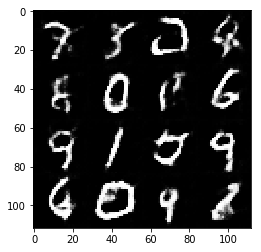

Epoch 1/2... Discriminator Loss: 1.1364... Generator Loss: 1.3428
Epoch 1/2... Discriminator Loss: 0.8720... Generator Loss: 0.8210
Epoch 1/2... Discriminator Loss: 0.8680... Generator Loss: 0.9462
Epoch 1/2... Discriminator Loss: 0.8723... Generator Loss: 0.9569
Epoch 1/2... Discriminator Loss: 0.8383... Generator Loss: 1.1986


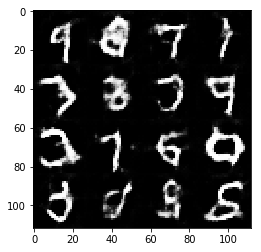

Epoch 1/2... Discriminator Loss: 0.9782... Generator Loss: 0.7619
Epoch 1/2... Discriminator Loss: 0.9004... Generator Loss: 1.3201
Epoch 1/2... Discriminator Loss: 1.0161... Generator Loss: 1.5256
Epoch 1/2... Discriminator Loss: 0.7979... Generator Loss: 1.4458
Epoch 1/2... Discriminator Loss: 1.3208... Generator Loss: 0.4236


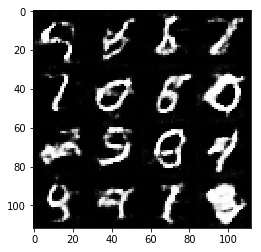

Epoch 1/2... Discriminator Loss: 0.9949... Generator Loss: 0.6140
Epoch 1/2... Discriminator Loss: 0.9511... Generator Loss: 0.8415
Epoch 1/2... Discriminator Loss: 1.0975... Generator Loss: 1.9191
Epoch 1/2... Discriminator Loss: 1.0103... Generator Loss: 2.0263
Epoch 1/2... Discriminator Loss: 0.8519... Generator Loss: 1.2312


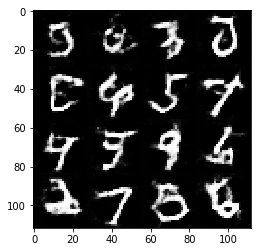

Epoch 1/2... Discriminator Loss: 0.7924... Generator Loss: 1.2104
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 0.7028
Epoch 1/2... Discriminator Loss: 0.7930... Generator Loss: 1.1015
Epoch 1/2... Discriminator Loss: 0.7961... Generator Loss: 1.1445
Epoch 1/2... Discriminator Loss: 1.0160... Generator Loss: 0.6460


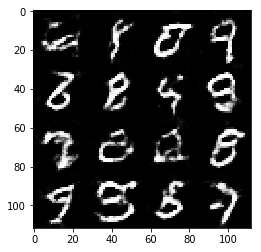

Epoch 1/2... Discriminator Loss: 0.8213... Generator Loss: 1.3636
Epoch 1/2... Discriminator Loss: 0.8717... Generator Loss: 0.9057
Epoch 1/2... Discriminator Loss: 0.9601... Generator Loss: 0.7342
Epoch 1/2... Discriminator Loss: 0.9973... Generator Loss: 2.0918
Epoch 1/2... Discriminator Loss: 0.9123... Generator Loss: 0.8147


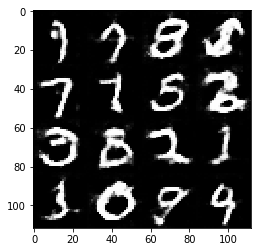

Epoch 1/2... Discriminator Loss: 1.2145... Generator Loss: 0.4440
Epoch 1/2... Discriminator Loss: 0.8864... Generator Loss: 0.9936
Epoch 1/2... Discriminator Loss: 1.0237... Generator Loss: 0.6319
Epoch 1/2... Discriminator Loss: 1.2839... Generator Loss: 0.4458
Epoch 1/2... Discriminator Loss: 1.0427... Generator Loss: 0.6141


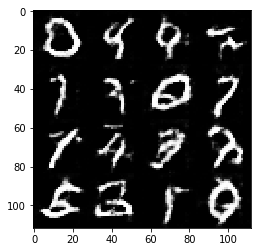

Epoch 1/2... Discriminator Loss: 0.9135... Generator Loss: 1.0471
Epoch 1/2... Discriminator Loss: 0.8963... Generator Loss: 0.9757
Epoch 1/2... Discriminator Loss: 0.7900... Generator Loss: 0.9891
Epoch 1/2... Discriminator Loss: 1.1393... Generator Loss: 1.9384
Epoch 1/2... Discriminator Loss: 0.9116... Generator Loss: 0.7840


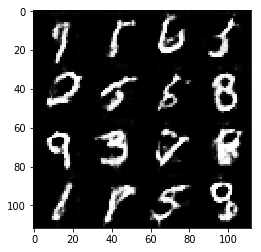

Epoch 1/2... Discriminator Loss: 0.9144... Generator Loss: 0.7722
Epoch 1/2... Discriminator Loss: 0.8667... Generator Loss: 1.0482
Epoch 1/2... Discriminator Loss: 0.8823... Generator Loss: 0.8005
Epoch 1/2... Discriminator Loss: 0.7512... Generator Loss: 0.9390
Epoch 1/2... Discriminator Loss: 0.6965... Generator Loss: 1.2724


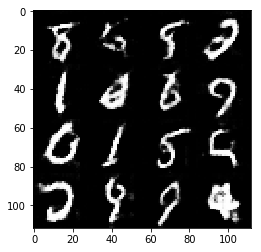

Epoch 1/2... Discriminator Loss: 1.0913... Generator Loss: 0.5989
Epoch 1/2... Discriminator Loss: 0.9008... Generator Loss: 0.9601
Epoch 1/2... Discriminator Loss: 1.2356... Generator Loss: 0.4985
Epoch 1/2... Discriminator Loss: 1.0098... Generator Loss: 0.6427
Epoch 1/2... Discriminator Loss: 0.6115... Generator Loss: 1.2622


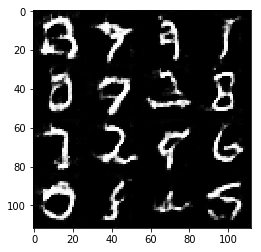

Epoch 1/2... Discriminator Loss: 0.8603... Generator Loss: 0.8740
Epoch 1/2... Discriminator Loss: 0.7907... Generator Loss: 1.2332
Epoch 1/2... Discriminator Loss: 1.1825... Generator Loss: 0.4942
Epoch 1/2... Discriminator Loss: 1.0022... Generator Loss: 0.7338
Epoch 1/2... Discriminator Loss: 1.2369... Generator Loss: 2.4344


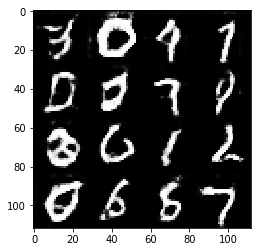

Epoch 1/2... Discriminator Loss: 0.8906... Generator Loss: 0.7832
Epoch 1/2... Discriminator Loss: 0.8925... Generator Loss: 0.9179
Epoch 1/2... Discriminator Loss: 1.0485... Generator Loss: 0.8042
Epoch 1/2... Discriminator Loss: 0.8069... Generator Loss: 0.9996
Epoch 1/2... Discriminator Loss: 0.9213... Generator Loss: 0.7587


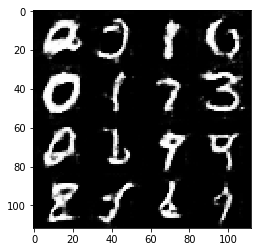

Epoch 1/2... Discriminator Loss: 0.9276... Generator Loss: 1.8149
Epoch 1/2... Discriminator Loss: 1.2532... Generator Loss: 0.4451
Epoch 1/2... Discriminator Loss: 0.8763... Generator Loss: 0.8097
Epoch 1/2... Discriminator Loss: 0.7689... Generator Loss: 1.1837
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.6564


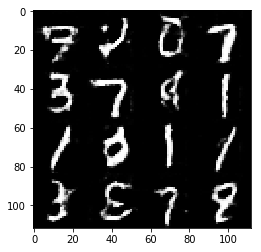

Epoch 1/2... Discriminator Loss: 0.9068... Generator Loss: 0.9184
Epoch 1/2... Discriminator Loss: 0.8015... Generator Loss: 0.9076
Epoch 1/2... Discriminator Loss: 0.8037... Generator Loss: 1.7956
Epoch 1/2... Discriminator Loss: 0.8647... Generator Loss: 0.8777
Epoch 1/2... Discriminator Loss: 0.8688... Generator Loss: 0.9261


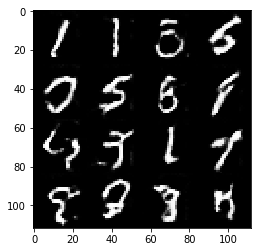

Epoch 1/2... Discriminator Loss: 0.8992... Generator Loss: 1.3485
Epoch 1/2... Discriminator Loss: 0.8693... Generator Loss: 1.0864
Epoch 1/2... Discriminator Loss: 0.8665... Generator Loss: 0.9746
Epoch 1/2... Discriminator Loss: 1.1868... Generator Loss: 0.5184
Epoch 1/2... Discriminator Loss: 0.9382... Generator Loss: 0.7795


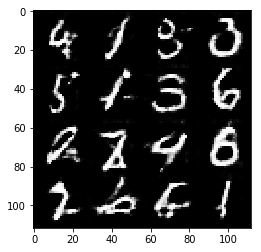

Epoch 1/2... Discriminator Loss: 0.9486... Generator Loss: 0.7096
Epoch 1/2... Discriminator Loss: 0.9153... Generator Loss: 1.2198
Epoch 1/2... Discriminator Loss: 0.8157... Generator Loss: 0.9891
Epoch 1/2... Discriminator Loss: 0.9013... Generator Loss: 1.1140
Epoch 1/2... Discriminator Loss: 1.0310... Generator Loss: 0.7158


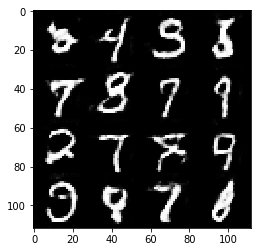

Epoch 1/2... Discriminator Loss: 0.8033... Generator Loss: 1.2993
Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 0.6699
Epoch 1/2... Discriminator Loss: 1.1916... Generator Loss: 0.4963


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.9313... Generator Loss: 0.3003
Epoch 0/1... Discriminator Loss: 0.4515... Generator Loss: 3.2836
Epoch 0/1... Discriminator Loss: 1.2573... Generator Loss: 0.5729
Epoch 0/1... Discriminator Loss: 0.4063... Generator Loss: 6.4474


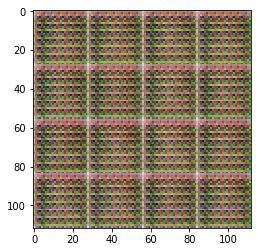

Epoch 0/1... Discriminator Loss: 0.8110... Generator Loss: 0.7606
Epoch 0/1... Discriminator Loss: 0.4787... Generator Loss: 1.6085
Epoch 0/1... Discriminator Loss: 1.3290... Generator Loss: 0.7021
Epoch 0/1... Discriminator Loss: 1.5296... Generator Loss: 0.6464
Epoch 0/1... Discriminator Loss: 0.7386... Generator Loss: 1.2620


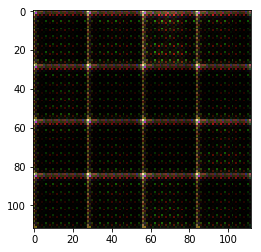

Epoch 0/1... Discriminator Loss: 0.9224... Generator Loss: 0.9167
Epoch 0/1... Discriminator Loss: 1.2420... Generator Loss: 0.5200
Epoch 0/1... Discriminator Loss: 1.0285... Generator Loss: 1.1295
Epoch 0/1... Discriminator Loss: 0.6365... Generator Loss: 1.6700
Epoch 0/1... Discriminator Loss: 1.5063... Generator Loss: 0.5022


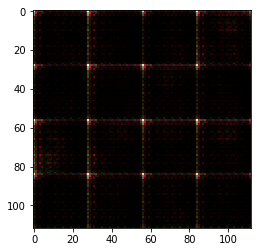

Epoch 0/1... Discriminator Loss: 1.2778... Generator Loss: 0.6576
Epoch 0/1... Discriminator Loss: 1.3656... Generator Loss: 0.5106
Epoch 0/1... Discriminator Loss: 1.2176... Generator Loss: 1.2540
Epoch 0/1... Discriminator Loss: 1.0436... Generator Loss: 1.2409
Epoch 0/1... Discriminator Loss: 1.2255... Generator Loss: 0.5305


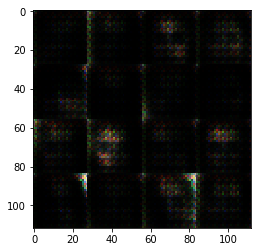

Epoch 0/1... Discriminator Loss: 1.3026... Generator Loss: 0.8181
Epoch 0/1... Discriminator Loss: 1.8077... Generator Loss: 0.3125
Epoch 0/1... Discriminator Loss: 0.8261... Generator Loss: 1.3763
Epoch 0/1... Discriminator Loss: 1.2645... Generator Loss: 1.6503
Epoch 0/1... Discriminator Loss: 1.0361... Generator Loss: 1.0498


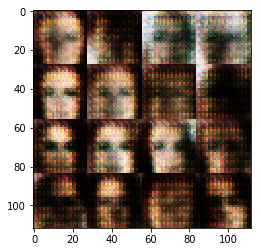

Epoch 0/1... Discriminator Loss: 0.9494... Generator Loss: 0.8582
Epoch 0/1... Discriminator Loss: 1.1249... Generator Loss: 0.9003
Epoch 0/1... Discriminator Loss: 1.1843... Generator Loss: 0.8753
Epoch 0/1... Discriminator Loss: 0.8822... Generator Loss: 1.0440
Epoch 0/1... Discriminator Loss: 1.5981... Generator Loss: 0.4827


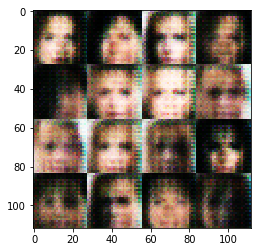

Epoch 0/1... Discriminator Loss: 1.3319... Generator Loss: 1.7757
Epoch 0/1... Discriminator Loss: 1.6349... Generator Loss: 0.4377
Epoch 0/1... Discriminator Loss: 1.0966... Generator Loss: 1.0502
Epoch 0/1... Discriminator Loss: 1.4600... Generator Loss: 0.7366
Epoch 0/1... Discriminator Loss: 0.7997... Generator Loss: 1.0697


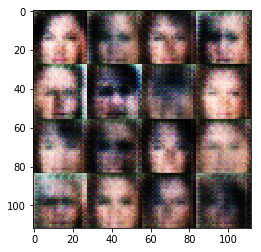

Epoch 0/1... Discriminator Loss: 2.0095... Generator Loss: 0.2500
Epoch 0/1... Discriminator Loss: 1.8828... Generator Loss: 0.7057
Epoch 0/1... Discriminator Loss: 1.5471... Generator Loss: 0.5471
Epoch 0/1... Discriminator Loss: 1.2448... Generator Loss: 0.9746
Epoch 0/1... Discriminator Loss: 1.5111... Generator Loss: 0.5419


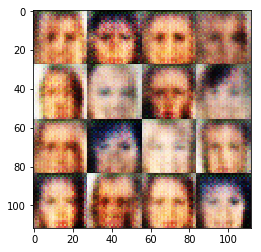

Epoch 0/1... Discriminator Loss: 1.1335... Generator Loss: 0.7936
Epoch 0/1... Discriminator Loss: 1.2970... Generator Loss: 1.1101
Epoch 0/1... Discriminator Loss: 1.5604... Generator Loss: 0.4647
Epoch 0/1... Discriminator Loss: 1.2512... Generator Loss: 0.6030
Epoch 0/1... Discriminator Loss: 1.1677... Generator Loss: 0.7100


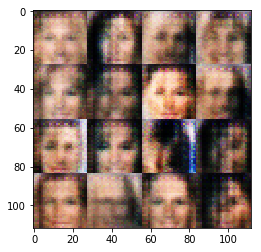

Epoch 0/1... Discriminator Loss: 1.3788... Generator Loss: 1.3773
Epoch 0/1... Discriminator Loss: 1.2545... Generator Loss: 0.7839
Epoch 0/1... Discriminator Loss: 1.6744... Generator Loss: 0.4302
Epoch 0/1... Discriminator Loss: 1.6193... Generator Loss: 0.4865
Epoch 0/1... Discriminator Loss: 1.3494... Generator Loss: 1.3036


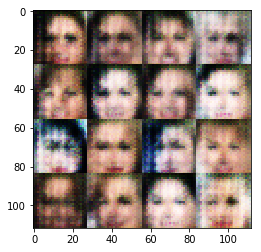

Epoch 0/1... Discriminator Loss: 1.3869... Generator Loss: 0.7579
Epoch 0/1... Discriminator Loss: 1.6115... Generator Loss: 0.5249
Epoch 0/1... Discriminator Loss: 1.5038... Generator Loss: 0.7503
Epoch 0/1... Discriminator Loss: 1.6359... Generator Loss: 0.6976
Epoch 0/1... Discriminator Loss: 1.4890... Generator Loss: 0.4158


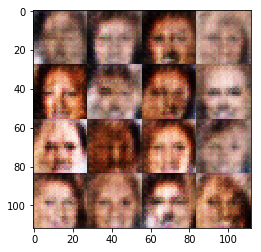

Epoch 0/1... Discriminator Loss: 1.3496... Generator Loss: 0.6490
Epoch 0/1... Discriminator Loss: 1.4477... Generator Loss: 1.1358
Epoch 0/1... Discriminator Loss: 1.2573... Generator Loss: 0.8704
Epoch 0/1... Discriminator Loss: 1.3032... Generator Loss: 0.8336
Epoch 0/1... Discriminator Loss: 1.3168... Generator Loss: 0.7272


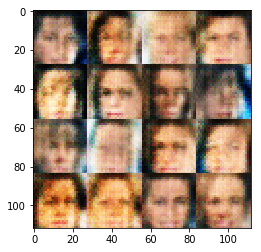

Epoch 0/1... Discriminator Loss: 1.3301... Generator Loss: 0.6533
Epoch 0/1... Discriminator Loss: 1.5345... Generator Loss: 0.8764
Epoch 0/1... Discriminator Loss: 1.4827... Generator Loss: 0.5581
Epoch 0/1... Discriminator Loss: 1.3648... Generator Loss: 0.7597
Epoch 0/1... Discriminator Loss: 1.3597... Generator Loss: 0.6666


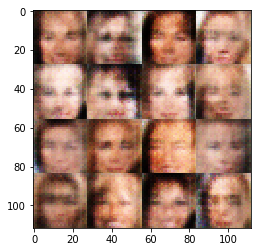

Epoch 0/1... Discriminator Loss: 1.2464... Generator Loss: 0.7347
Epoch 0/1... Discriminator Loss: 1.3226... Generator Loss: 0.6901
Epoch 0/1... Discriminator Loss: 1.3363... Generator Loss: 0.5914
Epoch 0/1... Discriminator Loss: 1.3677... Generator Loss: 1.0339
Epoch 0/1... Discriminator Loss: 1.3743... Generator Loss: 0.6437


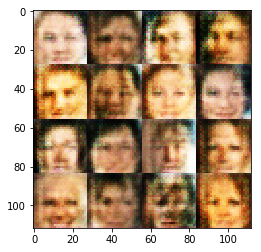

Epoch 0/1... Discriminator Loss: 1.5014... Generator Loss: 0.6907
Epoch 0/1... Discriminator Loss: 1.5721... Generator Loss: 0.6711
Epoch 0/1... Discriminator Loss: 1.2667... Generator Loss: 1.0872
Epoch 0/1... Discriminator Loss: 1.2880... Generator Loss: 0.8198
Epoch 0/1... Discriminator Loss: 1.2829... Generator Loss: 0.6985


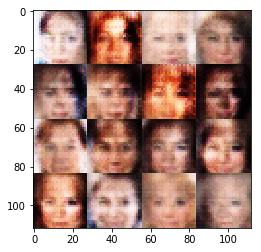

Epoch 0/1... Discriminator Loss: 1.3231... Generator Loss: 0.7566
Epoch 0/1... Discriminator Loss: 1.2276... Generator Loss: 0.7129
Epoch 0/1... Discriminator Loss: 1.1310... Generator Loss: 0.9171
Epoch 0/1... Discriminator Loss: 1.2670... Generator Loss: 0.7644
Epoch 0/1... Discriminator Loss: 1.3020... Generator Loss: 0.6047


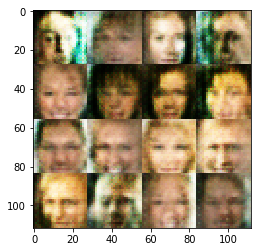

Epoch 0/1... Discriminator Loss: 1.4524... Generator Loss: 0.7390
Epoch 0/1... Discriminator Loss: 1.2467... Generator Loss: 0.7515
Epoch 0/1... Discriminator Loss: 1.4628... Generator Loss: 0.6430
Epoch 0/1... Discriminator Loss: 1.3206... Generator Loss: 0.7084
Epoch 0/1... Discriminator Loss: 1.5173... Generator Loss: 0.6450


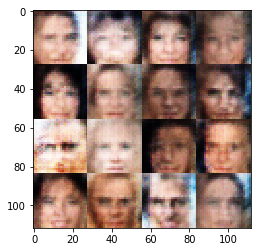

Epoch 0/1... Discriminator Loss: 1.2428... Generator Loss: 0.7799
Epoch 0/1... Discriminator Loss: 1.3960... Generator Loss: 0.5873
Epoch 0/1... Discriminator Loss: 1.3194... Generator Loss: 0.9716
Epoch 0/1... Discriminator Loss: 1.2213... Generator Loss: 0.7327
Epoch 0/1... Discriminator Loss: 1.1815... Generator Loss: 0.8054


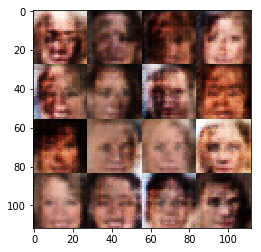

Epoch 0/1... Discriminator Loss: 1.2708... Generator Loss: 0.9601
Epoch 0/1... Discriminator Loss: 1.2449... Generator Loss: 0.7349
Epoch 0/1... Discriminator Loss: 1.1813... Generator Loss: 1.0467
Epoch 0/1... Discriminator Loss: 1.3337... Generator Loss: 0.6748
Epoch 0/1... Discriminator Loss: 1.2199... Generator Loss: 0.6115


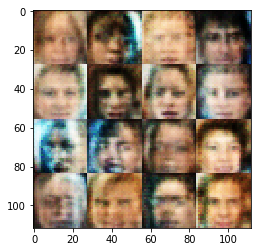

Epoch 0/1... Discriminator Loss: 1.3603... Generator Loss: 0.9358
Epoch 0/1... Discriminator Loss: 1.5607... Generator Loss: 0.5536
Epoch 0/1... Discriminator Loss: 1.2793... Generator Loss: 0.7962
Epoch 0/1... Discriminator Loss: 1.2420... Generator Loss: 0.7206
Epoch 0/1... Discriminator Loss: 1.2575... Generator Loss: 0.9265


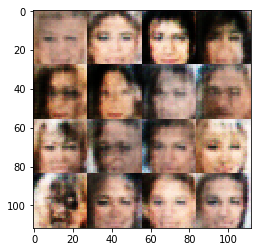

Epoch 0/1... Discriminator Loss: 1.2987... Generator Loss: 0.6924
Epoch 0/1... Discriminator Loss: 1.2951... Generator Loss: 0.6577
Epoch 0/1... Discriminator Loss: 1.1656... Generator Loss: 0.8119
Epoch 0/1... Discriminator Loss: 1.0486... Generator Loss: 1.1153
Epoch 0/1... Discriminator Loss: 1.3339... Generator Loss: 1.0006


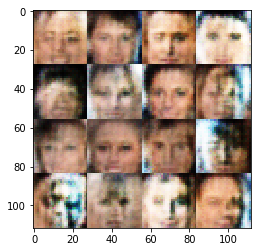

Epoch 0/1... Discriminator Loss: 1.4313... Generator Loss: 0.6212
Epoch 0/1... Discriminator Loss: 1.4784... Generator Loss: 0.5554
Epoch 0/1... Discriminator Loss: 1.1832... Generator Loss: 0.7608
Epoch 0/1... Discriminator Loss: 1.2412... Generator Loss: 0.7279
Epoch 0/1... Discriminator Loss: 1.5849... Generator Loss: 0.6816


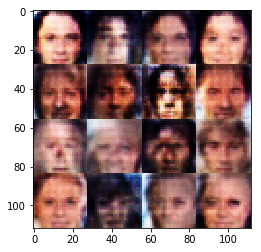

Epoch 0/1... Discriminator Loss: 1.1698... Generator Loss: 0.6438
Epoch 0/1... Discriminator Loss: 1.4809... Generator Loss: 0.9866
Epoch 0/1... Discriminator Loss: 1.0089... Generator Loss: 0.9532
Epoch 0/1... Discriminator Loss: 1.3642... Generator Loss: 0.7188
Epoch 0/1... Discriminator Loss: 1.2499... Generator Loss: 0.7681


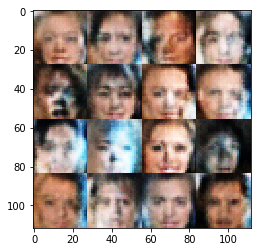

Epoch 0/1... Discriminator Loss: 1.1593... Generator Loss: 0.8147
Epoch 0/1... Discriminator Loss: 1.6784... Generator Loss: 0.3100
Epoch 0/1... Discriminator Loss: 1.2356... Generator Loss: 1.0035
Epoch 0/1... Discriminator Loss: 1.1694... Generator Loss: 0.7603
Epoch 0/1... Discriminator Loss: 1.4735... Generator Loss: 0.7813


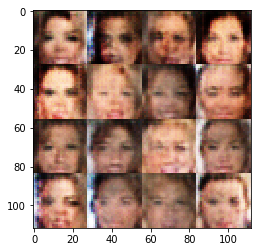

Epoch 0/1... Discriminator Loss: 1.5331... Generator Loss: 0.6977
Epoch 0/1... Discriminator Loss: 1.3017... Generator Loss: 0.7153
Epoch 0/1... Discriminator Loss: 1.3346... Generator Loss: 0.8443
Epoch 0/1... Discriminator Loss: 1.5509... Generator Loss: 0.7608
Epoch 0/1... Discriminator Loss: 1.2153... Generator Loss: 0.6728


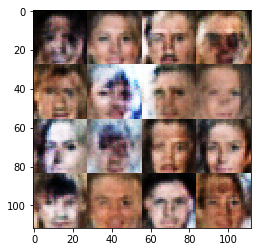

Epoch 0/1... Discriminator Loss: 1.1679... Generator Loss: 0.8452
Epoch 0/1... Discriminator Loss: 1.4806... Generator Loss: 1.2778
Epoch 0/1... Discriminator Loss: 1.1818... Generator Loss: 0.9381
Epoch 0/1... Discriminator Loss: 1.2417... Generator Loss: 0.8964
Epoch 0/1... Discriminator Loss: 1.1760... Generator Loss: 0.8154


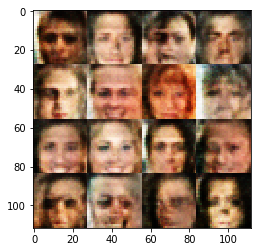

Epoch 0/1... Discriminator Loss: 1.3052... Generator Loss: 0.8047
Epoch 0/1... Discriminator Loss: 1.0804... Generator Loss: 0.8509
Epoch 0/1... Discriminator Loss: 1.1707... Generator Loss: 0.7374
Epoch 0/1... Discriminator Loss: 1.2176... Generator Loss: 0.6987
Epoch 0/1... Discriminator Loss: 1.4022... Generator Loss: 1.1478


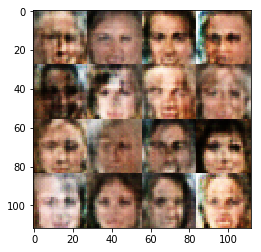

Epoch 0/1... Discriminator Loss: 1.4953... Generator Loss: 0.5958
Epoch 0/1... Discriminator Loss: 1.1197... Generator Loss: 0.8994
Epoch 0/1... Discriminator Loss: 0.9055... Generator Loss: 1.0208
Epoch 0/1... Discriminator Loss: 1.0383... Generator Loss: 0.8311
Epoch 0/1... Discriminator Loss: 1.1872... Generator Loss: 1.0106


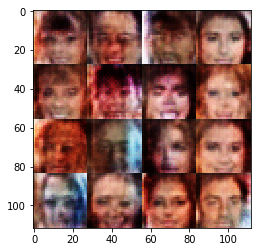

Epoch 0/1... Discriminator Loss: 1.2798... Generator Loss: 0.6727
Epoch 0/1... Discriminator Loss: 1.7329... Generator Loss: 1.4022
Epoch 0/1... Discriminator Loss: 1.1617... Generator Loss: 0.7713
Epoch 0/1... Discriminator Loss: 1.2873... Generator Loss: 0.6531
Epoch 0/1... Discriminator Loss: 1.5426... Generator Loss: 0.4837


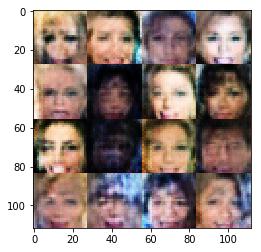

Epoch 0/1... Discriminator Loss: 1.2052... Generator Loss: 0.7340
Epoch 0/1... Discriminator Loss: 1.1778... Generator Loss: 1.0073
Epoch 0/1... Discriminator Loss: 1.2157... Generator Loss: 0.6955
Epoch 0/1... Discriminator Loss: 1.0189... Generator Loss: 1.6856
Epoch 0/1... Discriminator Loss: 1.4610... Generator Loss: 0.5567


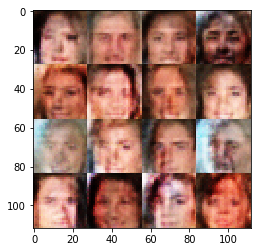

Epoch 0/1... Discriminator Loss: 1.3424... Generator Loss: 0.5789
Epoch 0/1... Discriminator Loss: 1.5114... Generator Loss: 1.5239
Epoch 0/1... Discriminator Loss: 1.0234... Generator Loss: 1.3318
Epoch 0/1... Discriminator Loss: 1.2669... Generator Loss: 0.6941
Epoch 0/1... Discriminator Loss: 1.1997... Generator Loss: 0.8411


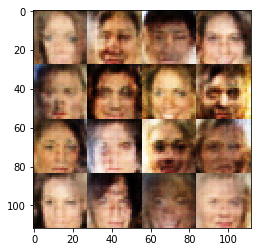

Epoch 0/1... Discriminator Loss: 1.3467... Generator Loss: 0.6379
Epoch 0/1... Discriminator Loss: 1.0465... Generator Loss: 1.0624
Epoch 0/1... Discriminator Loss: 1.1051... Generator Loss: 0.6841
Epoch 0/1... Discriminator Loss: 1.2196... Generator Loss: 0.6320
Epoch 0/1... Discriminator Loss: 1.0865... Generator Loss: 0.8903


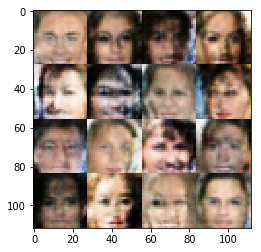

Epoch 0/1... Discriminator Loss: 1.4057... Generator Loss: 0.4860
Epoch 0/1... Discriminator Loss: 1.1622... Generator Loss: 0.9240
Epoch 0/1... Discriminator Loss: 1.2508... Generator Loss: 1.1131
Epoch 0/1... Discriminator Loss: 1.1708... Generator Loss: 0.9635
Epoch 0/1... Discriminator Loss: 1.3317... Generator Loss: 0.5538


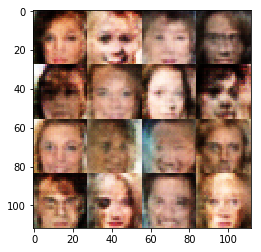

Epoch 0/1... Discriminator Loss: 0.8414... Generator Loss: 1.4998
Epoch 0/1... Discriminator Loss: 1.0753... Generator Loss: 1.0117
Epoch 0/1... Discriminator Loss: 1.1553... Generator Loss: 0.8037
Epoch 0/1... Discriminator Loss: 1.1418... Generator Loss: 0.7289
Epoch 0/1... Discriminator Loss: 1.2757... Generator Loss: 0.6648


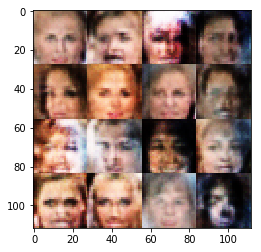

Epoch 0/1... Discriminator Loss: 1.2994... Generator Loss: 0.9442
Epoch 0/1... Discriminator Loss: 1.2632... Generator Loss: 0.8724
Epoch 0/1... Discriminator Loss: 1.2677... Generator Loss: 0.8455
Epoch 0/1... Discriminator Loss: 1.3300... Generator Loss: 0.7579
Epoch 0/1... Discriminator Loss: 1.1777... Generator Loss: 0.7270


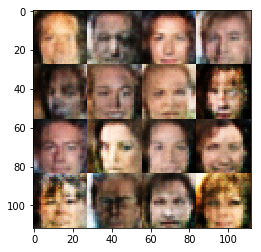

Epoch 0/1... Discriminator Loss: 1.0205... Generator Loss: 0.8162
Epoch 0/1... Discriminator Loss: 0.9888... Generator Loss: 1.2525
Epoch 0/1... Discriminator Loss: 1.3600... Generator Loss: 0.4689
Epoch 0/1... Discriminator Loss: 1.1674... Generator Loss: 0.6673
Epoch 0/1... Discriminator Loss: 1.1504... Generator Loss: 0.7137


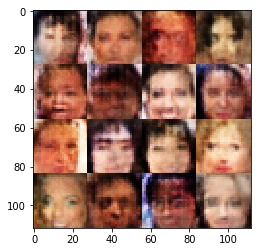

Epoch 0/1... Discriminator Loss: 1.3587... Generator Loss: 0.7269
Epoch 0/1... Discriminator Loss: 1.1033... Generator Loss: 0.9180
Epoch 0/1... Discriminator Loss: 1.3487... Generator Loss: 0.6103
Epoch 0/1... Discriminator Loss: 1.5895... Generator Loss: 0.4070
Epoch 0/1... Discriminator Loss: 1.2257... Generator Loss: 0.6470


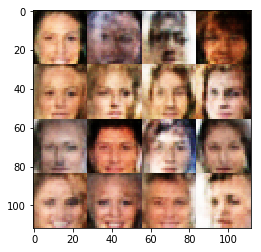

Epoch 0/1... Discriminator Loss: 1.2010... Generator Loss: 0.7000
Epoch 0/1... Discriminator Loss: 1.1946... Generator Loss: 0.8927
Epoch 0/1... Discriminator Loss: 1.5275... Generator Loss: 0.4092
Epoch 0/1... Discriminator Loss: 1.0540... Generator Loss: 1.1032
Epoch 0/1... Discriminator Loss: 1.5121... Generator Loss: 0.3685


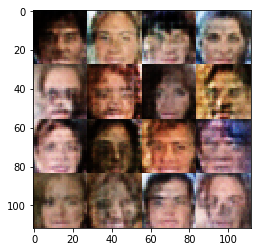

Epoch 0/1... Discriminator Loss: 1.1147... Generator Loss: 1.2170
Epoch 0/1... Discriminator Loss: 1.1424... Generator Loss: 0.7703
Epoch 0/1... Discriminator Loss: 0.9830... Generator Loss: 1.1754
Epoch 0/1... Discriminator Loss: 1.0817... Generator Loss: 0.8107
Epoch 0/1... Discriminator Loss: 1.0875... Generator Loss: 1.0248


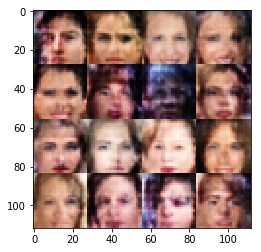

Epoch 0/1... Discriminator Loss: 0.9945... Generator Loss: 0.8512
Epoch 0/1... Discriminator Loss: 1.3064... Generator Loss: 1.4448
Epoch 0/1... Discriminator Loss: 1.0610... Generator Loss: 0.8784
Epoch 0/1... Discriminator Loss: 1.1763... Generator Loss: 0.7578
Epoch 0/1... Discriminator Loss: 1.2758... Generator Loss: 0.8941


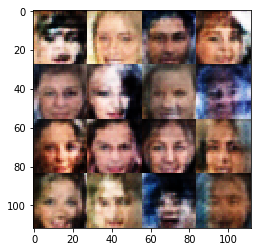

Epoch 0/1... Discriminator Loss: 1.2023... Generator Loss: 1.1037
Epoch 0/1... Discriminator Loss: 1.2730... Generator Loss: 0.6872
Epoch 0/1... Discriminator Loss: 1.0809... Generator Loss: 1.0934
Epoch 0/1... Discriminator Loss: 1.4151... Generator Loss: 0.6934
Epoch 0/1... Discriminator Loss: 1.4533... Generator Loss: 0.4261


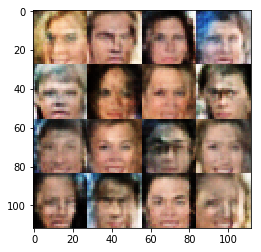

Epoch 0/1... Discriminator Loss: 1.3145... Generator Loss: 0.5054
Epoch 0/1... Discriminator Loss: 1.3267... Generator Loss: 0.5803
Epoch 0/1... Discriminator Loss: 1.1475... Generator Loss: 0.7480
Epoch 0/1... Discriminator Loss: 0.9160... Generator Loss: 1.3874
Epoch 0/1... Discriminator Loss: 1.3558... Generator Loss: 0.4544


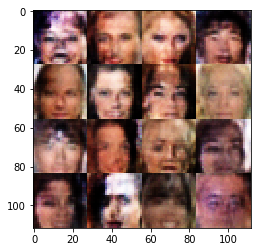

Epoch 0/1... Discriminator Loss: 1.1447... Generator Loss: 0.6583
Epoch 0/1... Discriminator Loss: 1.1564... Generator Loss: 0.7068
Epoch 0/1... Discriminator Loss: 1.4797... Generator Loss: 0.6455
Epoch 0/1... Discriminator Loss: 1.2006... Generator Loss: 0.6438
Epoch 0/1... Discriminator Loss: 1.3279... Generator Loss: 0.6808


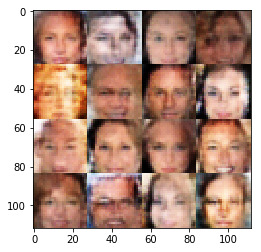

Epoch 0/1... Discriminator Loss: 1.0884... Generator Loss: 0.8483
Epoch 0/1... Discriminator Loss: 1.0719... Generator Loss: 1.2121
Epoch 0/1... Discriminator Loss: 1.3119... Generator Loss: 0.5063
Epoch 0/1... Discriminator Loss: 1.3106... Generator Loss: 0.7384
Epoch 0/1... Discriminator Loss: 1.1751... Generator Loss: 0.6836


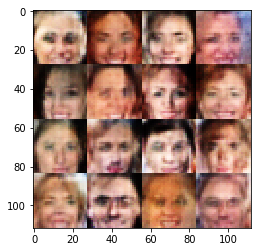

Epoch 0/1... Discriminator Loss: 1.2248... Generator Loss: 0.5919
Epoch 0/1... Discriminator Loss: 1.0265... Generator Loss: 0.7044
Epoch 0/1... Discriminator Loss: 1.7303... Generator Loss: 0.2454
Epoch 0/1... Discriminator Loss: 1.3133... Generator Loss: 0.5867
Epoch 0/1... Discriminator Loss: 1.2538... Generator Loss: 0.8628


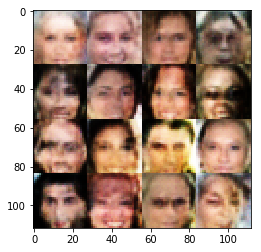

Epoch 0/1... Discriminator Loss: 1.1842... Generator Loss: 0.8134
Epoch 0/1... Discriminator Loss: 1.1813... Generator Loss: 0.6086
Epoch 0/1... Discriminator Loss: 0.9925... Generator Loss: 1.2513
Epoch 0/1... Discriminator Loss: 1.1878... Generator Loss: 1.4944
Epoch 0/1... Discriminator Loss: 1.1408... Generator Loss: 0.9500


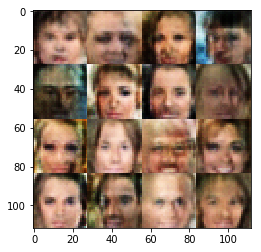

Epoch 0/1... Discriminator Loss: 0.9048... Generator Loss: 1.1055
Epoch 0/1... Discriminator Loss: 1.2491... Generator Loss: 0.8584
Epoch 0/1... Discriminator Loss: 1.3360... Generator Loss: 0.5214
Epoch 0/1... Discriminator Loss: 1.1876... Generator Loss: 0.6492
Epoch 0/1... Discriminator Loss: 1.0585... Generator Loss: 1.0675


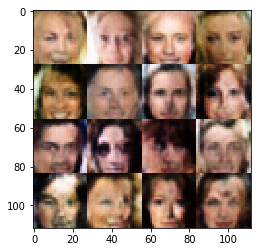

Epoch 0/1... Discriminator Loss: 1.2086... Generator Loss: 0.6374
Epoch 0/1... Discriminator Loss: 1.2010... Generator Loss: 0.8683
Epoch 0/1... Discriminator Loss: 1.0786... Generator Loss: 0.8739
Epoch 0/1... Discriminator Loss: 1.5929... Generator Loss: 0.3319
Epoch 0/1... Discriminator Loss: 1.3077... Generator Loss: 0.9153


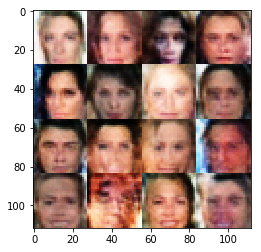

Epoch 0/1... Discriminator Loss: 1.5067... Generator Loss: 0.3457
Epoch 0/1... Discriminator Loss: 1.2228... Generator Loss: 1.8374
Epoch 0/1... Discriminator Loss: 1.2309... Generator Loss: 0.6875
Epoch 0/1... Discriminator Loss: 1.2664... Generator Loss: 0.6609
Epoch 0/1... Discriminator Loss: 1.1639... Generator Loss: 0.6737


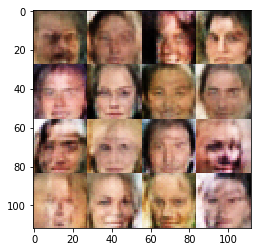

Epoch 0/1... Discriminator Loss: 0.9369... Generator Loss: 0.9708
Epoch 0/1... Discriminator Loss: 1.2222... Generator Loss: 0.7013
Epoch 0/1... Discriminator Loss: 1.2418... Generator Loss: 0.6405
Epoch 0/1... Discriminator Loss: 1.1441... Generator Loss: 0.7428
Epoch 0/1... Discriminator Loss: 1.1812... Generator Loss: 0.7348


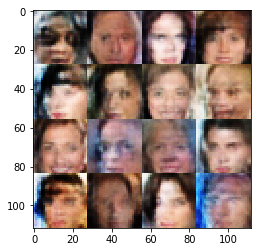

Epoch 0/1... Discriminator Loss: 0.9146... Generator Loss: 1.0454
Epoch 0/1... Discriminator Loss: 1.2144... Generator Loss: 0.6740
Epoch 0/1... Discriminator Loss: 1.3535... Generator Loss: 0.5064
Epoch 0/1... Discriminator Loss: 1.1760... Generator Loss: 1.2742
Epoch 0/1... Discriminator Loss: 1.2251... Generator Loss: 0.7568


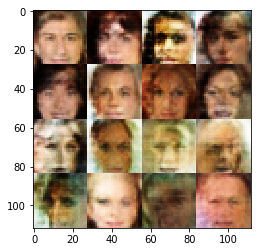

Epoch 0/1... Discriminator Loss: 1.4450... Generator Loss: 0.5010
Epoch 0/1... Discriminator Loss: 1.1448... Generator Loss: 0.8321
Epoch 0/1... Discriminator Loss: 0.8335... Generator Loss: 1.2144
Epoch 0/1... Discriminator Loss: 1.0390... Generator Loss: 0.9456
Epoch 0/1... Discriminator Loss: 1.1664... Generator Loss: 0.9229


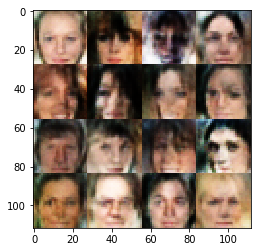

Epoch 0/1... Discriminator Loss: 1.0534... Generator Loss: 0.8832
Epoch 0/1... Discriminator Loss: 1.0439... Generator Loss: 0.8530
Epoch 0/1... Discriminator Loss: 1.1391... Generator Loss: 0.7522
Epoch 0/1... Discriminator Loss: 1.1435... Generator Loss: 0.9830
Epoch 0/1... Discriminator Loss: 1.3054... Generator Loss: 0.5190


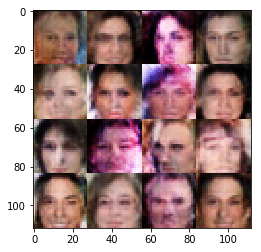

Epoch 0/1... Discriminator Loss: 1.0168... Generator Loss: 0.9889
Epoch 0/1... Discriminator Loss: 1.2207... Generator Loss: 0.6504
Epoch 0/1... Discriminator Loss: 1.4281... Generator Loss: 0.5861
Epoch 0/1... Discriminator Loss: 1.6306... Generator Loss: 0.3051
Epoch 0/1... Discriminator Loss: 1.2249... Generator Loss: 0.8001


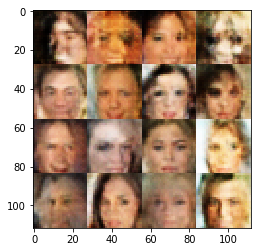

Epoch 0/1... Discriminator Loss: 1.0751... Generator Loss: 0.9748
Epoch 0/1... Discriminator Loss: 1.2856... Generator Loss: 0.7009
Epoch 0/1... Discriminator Loss: 1.0897... Generator Loss: 1.0496
Epoch 0/1... Discriminator Loss: 1.0542... Generator Loss: 0.9506
Epoch 0/1... Discriminator Loss: 1.1693... Generator Loss: 0.8034


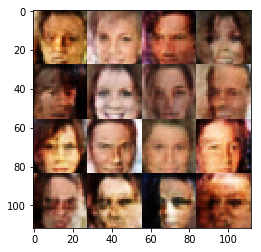

Epoch 0/1... Discriminator Loss: 1.4057... Generator Loss: 0.7467
Epoch 0/1... Discriminator Loss: 1.3487... Generator Loss: 0.6532
Epoch 0/1... Discriminator Loss: 1.3650... Generator Loss: 0.5813
Epoch 0/1... Discriminator Loss: 1.2462... Generator Loss: 0.6841
Epoch 0/1... Discriminator Loss: 1.3239... Generator Loss: 0.6036


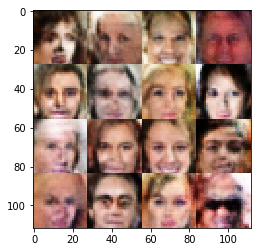

Epoch 0/1... Discriminator Loss: 1.0133... Generator Loss: 1.0542
Epoch 0/1... Discriminator Loss: 1.1949... Generator Loss: 0.6229
Epoch 0/1... Discriminator Loss: 0.9532... Generator Loss: 1.8106
Epoch 0/1... Discriminator Loss: 1.2085... Generator Loss: 0.8367
Epoch 0/1... Discriminator Loss: 1.1596... Generator Loss: 0.5545


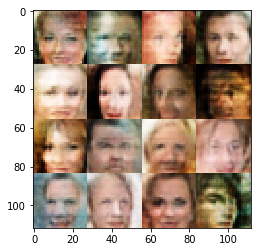

Epoch 0/1... Discriminator Loss: 1.3065... Generator Loss: 0.6404
Epoch 0/1... Discriminator Loss: 1.2119... Generator Loss: 0.7304
Epoch 0/1... Discriminator Loss: 1.1639... Generator Loss: 0.9898
Epoch 0/1... Discriminator Loss: 0.8900... Generator Loss: 0.9855
Epoch 0/1... Discriminator Loss: 1.1382... Generator Loss: 1.0428


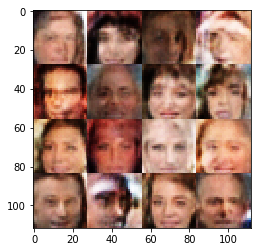

Epoch 0/1... Discriminator Loss: 1.2238... Generator Loss: 1.3119
Epoch 0/1... Discriminator Loss: 1.0208... Generator Loss: 1.0604
Epoch 0/1... Discriminator Loss: 1.5485... Generator Loss: 0.3500
Epoch 0/1... Discriminator Loss: 1.3027... Generator Loss: 0.5470
Epoch 0/1... Discriminator Loss: 1.1174... Generator Loss: 0.6683


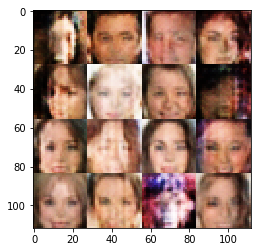

Epoch 0/1... Discriminator Loss: 1.2810... Generator Loss: 0.7389
Epoch 0/1... Discriminator Loss: 0.9121... Generator Loss: 1.2684
Epoch 0/1... Discriminator Loss: 1.0742... Generator Loss: 1.0369
Epoch 0/1... Discriminator Loss: 1.4956... Generator Loss: 0.3562
Epoch 0/1... Discriminator Loss: 1.1039... Generator Loss: 0.8272


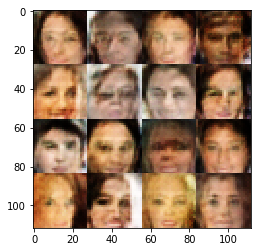

Epoch 0/1... Discriminator Loss: 1.1415... Generator Loss: 0.8401
Epoch 0/1... Discriminator Loss: 1.2333... Generator Loss: 0.5394
Epoch 0/1... Discriminator Loss: 1.3608... Generator Loss: 0.7572
Epoch 0/1... Discriminator Loss: 1.1044... Generator Loss: 0.9938
Epoch 0/1... Discriminator Loss: 1.0184... Generator Loss: 0.9658


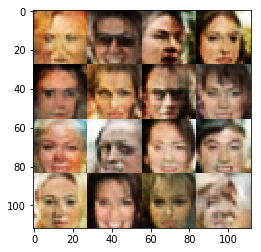

Epoch 0/1... Discriminator Loss: 1.1999... Generator Loss: 0.6606
Epoch 0/1... Discriminator Loss: 1.2019... Generator Loss: 0.7667
Epoch 0/1... Discriminator Loss: 1.4005... Generator Loss: 0.5417
Epoch 0/1... Discriminator Loss: 1.0970... Generator Loss: 0.7218
Epoch 0/1... Discriminator Loss: 1.1497... Generator Loss: 0.8591


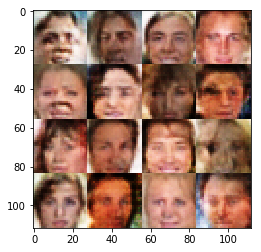

Epoch 0/1... Discriminator Loss: 1.1091... Generator Loss: 0.9810
Epoch 0/1... Discriminator Loss: 1.5406... Generator Loss: 0.3559
Epoch 0/1... Discriminator Loss: 1.1129... Generator Loss: 0.9946
Epoch 0/1... Discriminator Loss: 1.3071... Generator Loss: 0.5672
Epoch 0/1... Discriminator Loss: 1.0884... Generator Loss: 1.0083


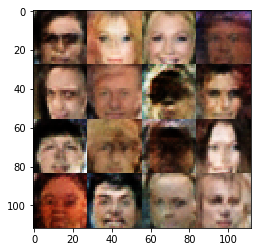

Epoch 0/1... Discriminator Loss: 1.3642... Generator Loss: 0.5215
Epoch 0/1... Discriminator Loss: 0.9811... Generator Loss: 0.8598


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.